In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chisqprob
from scipy.stats import chisquare
%matplotlib inline

In [2]:
# Set the font path properly here if not using Windows. Otherwise just comment this out
plt.style.use('ggplot')
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(size=12)
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'12'}

In [3]:
def GoodnessOfFitPoisson(observedValues, blockageType):
    xSum = np.sum(observedValues)
    muHat = xSum / len(observedValues)
    # Since the expected value of Poisson is equal to its mean
    # we will use mean to perform chisquare test of goodness-of-fit
    expectedValues = np.ones(shape=(1, len(X))).fill(muHat)
    goodnessOfFit = chisquare(observedValues, expectedValues)
    print('{0}\tChisquare-Value: {1}\tp-Value: {2}'.format(blockageType,goodnessOfFit.statistic,
                                                           goodnessOfFit.pvalue))

In [4]:
def GeneralizedLinearRegression(blockageData,dependentVariable,independentVariable, distributionFamily,
                                familyName, blockageName, graphFileName):
    print('GENERALIZED LINEAR REGRESSION - {0} Family, for {1}'.format(familyName,blockageName))
    formula = '{0}~{1}'.format(dependentVariable,independentVariable)
    model = smf.glm(formula=formula, data=blockageData, family=distributionFamily)
    fittedModel = model.fit()
    print('Deviance Residual', fittedModel.deviance)
    pearsonResiduals = fittedModel.resid_pearson
    devianceResiduals = fittedModel.resid_deviance
    pValue = chisqprob(fittedModel.deviance, fittedModel.df_resid)
    # H0 (null hypothesis) : Model correctly follows given distribution
    # H1 (alternative hypothesis): Model does not follow given distribution
    print('Chisquare value', pValue)
    if pValue > 0.05:
        print('Can NOT reject the null hypothesis. Model correctly follows {0} distribution.'.format(familyName))
    else:
        print('Reject the null hypothesis. Model does not follow {0} distribution'.format(familyName))
    print(fittedModel.summary())
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
         31, 32, 33, 34, 35]
    newValues = pd.DataFrame(x)
    newValues.columns = ['Index']
    predictedY = fittedModel.predict(newValues)
    labelObservedData = 'Observed Data - {0}'.format(blockageName)
    plt.figure(figsize=(10, 8), dpi=400)
    plt.scatter(blockageData['Index'], blockageData[blockageType], color='red', label=labelObservedData)
    plt.plot(predictedY, marker='o', color='purple', label='Fitted/Predicted')
    plt.xlabel('Index', **axis_font)
    plt.ylabel('Blockage Count', **axis_font)
    plt.legend(prop=font_prop, numpoints=1,loc='upper right')
    plt.savefig(graphFileName, dpi=400)
    plt.show()
    print('=========================================================================================================')
    print('=========================================================================================================')

In [5]:
folderLocationData = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\DataFiles"
fileName = "PoissonDataMonthly.csv"
file = "PoissonDataMonthly"
completeFilePath = "{0}\\{1}".format(folderLocationData,fileName)

folderLocationImages = "C:\\Users\\lenovo\\Documents\\Dissertation\\Report\\Images\\"


data = pd.DataFrame(pd.read_csv(completeFilePath))
blockageTypes = ['TotalCount','SanitaryProductsCount','UnknownCount']
blockageTypeNames = ['Total Blockages','Sanitary Products','Missing\\Unknown']
i = 0

GENERALIZED LINEAR REGRESSION - Poisson Family, for Total Blockages
Deviance Residual 507.435790036
Chisquare value 1.00036391943e-92
Reject the null hypothesis. Model does not follow Poisson distribution
                 Generalized Linear Model Regression Results                  
Dep. Variable:             TotalCount   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -371.17
Date:                Sat, 13 Aug 2016   Deviance:                       507.44
Time:                        12:43:52   Pearson chi2:                     508.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----

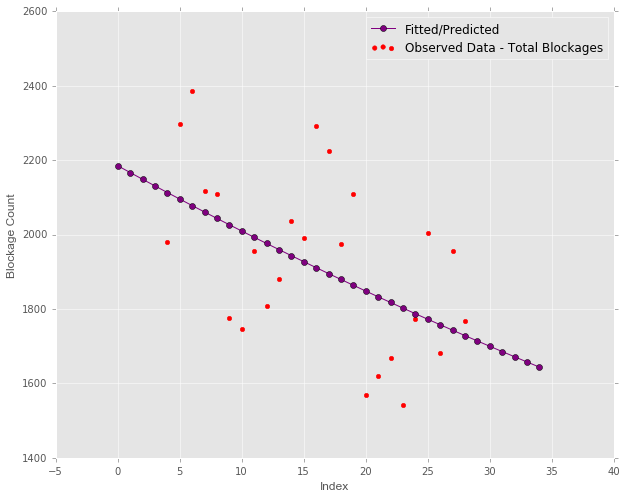

GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Total Blockages
Deviance Residual 0.26456939087
Chisquare value 1.0
Can NOT reject the null hypothesis. Model correctly follows Negative Binomial distribution.
                 Generalized Linear Model Regression Results                  
Dep. Variable:             TotalCount   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                 0.0114862351877
Method:                          IRLS   Log-Likelihood:                -214.10
Date:                Sat, 13 Aug 2016   Deviance:                      0.26457
Time:                        12:43:53   Pearson chi2:                    0.264
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [95.0% 

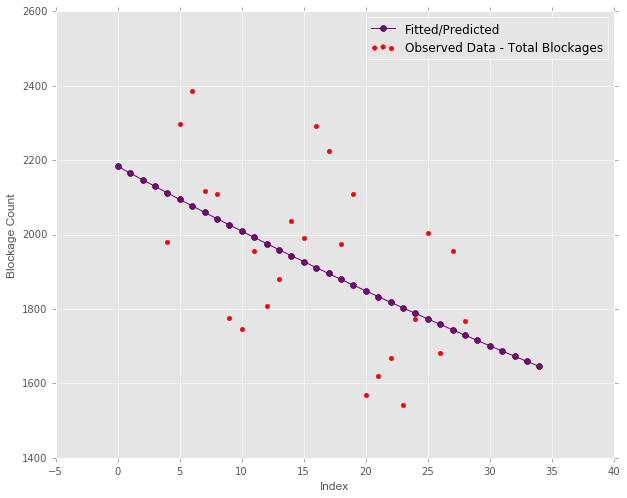

GENERALIZED LINEAR REGRESSION - Poisson Family, for Sanitary Products
Deviance Residual 1068.20811671
Chisquare value 4.11819410412e-211
Reject the null hypothesis. Model does not follow Poisson distribution
                   Generalized Linear Model Regression Results                   
Dep. Variable:     SanitaryProductsCount   No. Observations:                   25
Model:                               GLM   Df Residuals:                       23
Model Family:                    Poisson   Df Model:                            1
Link Function:                       log   Scale:                             1.0
Method:                             IRLS   Log-Likelihood:                -642.08
Date:                   Sat, 13 Aug 2016   Deviance:                       1068.2
Time:                           12:43:55   Pearson chi2:                 1.08e+03
No. Iterations:                        7                                         
                 coef    std err          z      P>|z|

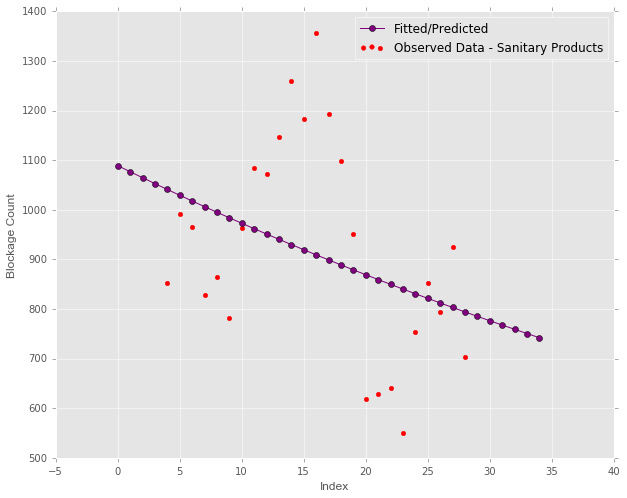

GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Sanitary Products
Deviance Residual 1.17853167621
Chisquare value 0.99999999999
Can NOT reject the null hypothesis. Model correctly follows Negative Binomial distribution.
                   Generalized Linear Model Regression Results                   
Dep. Variable:     SanitaryProductsCount   No. Observations:                   25
Model:                               GLM   Df Residuals:                       23
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                 0.0513336767955
Method:                             IRLS   Log-Likelihood:                -195.60
Date:                   Sat, 13 Aug 2016   Deviance:                       1.1785
Time:                           12:43:56   Pearson chi2:                     1.18
No. Iterations:                        6                                         
                 coef    std

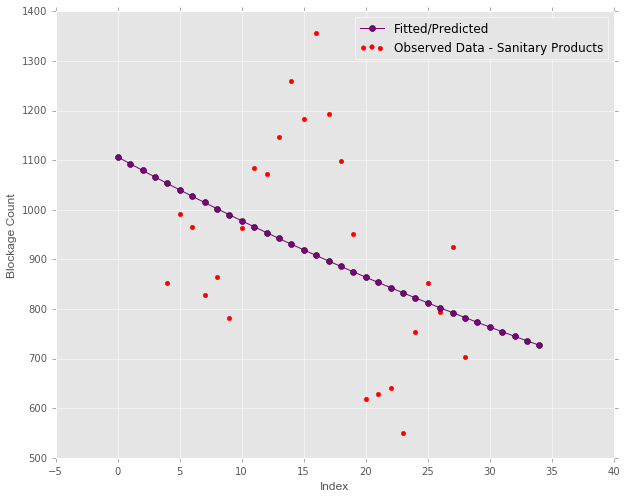

GENERALIZED LINEAR REGRESSION - Poisson Family, for Missing\Unknown
Deviance Residual 547.844551145
Chisquare value 3.74574477146e-101
Reject the null hypothesis. Model does not follow Poisson distribution
                 Generalized Linear Model Regression Results                  
Dep. Variable:           UnknownCount   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -371.62
Date:                Sat, 13 Aug 2016   Deviance:                       547.84
Time:                        12:43:57   Pearson chi2:                     569.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----

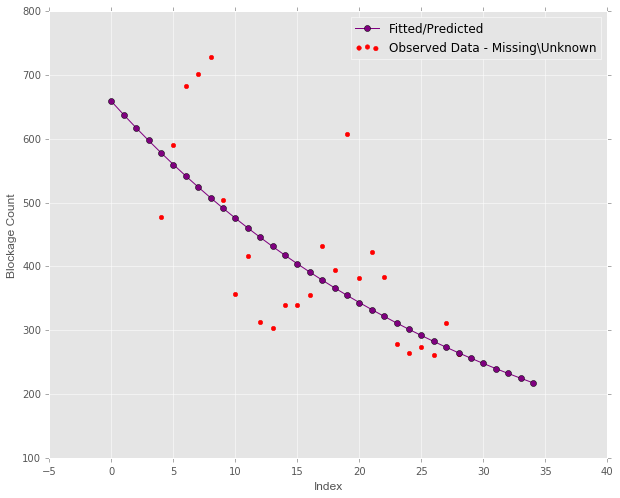

GENERALIZED LINEAR REGRESSION - Negative Binomial Family, for Missing\Unknown
Deviance Residual 1.22857193581
Chisquare value 0.999999999985
Can NOT reject the null hypothesis. Model correctly follows Negative Binomial distribution.
                 Generalized Linear Model Regression Results                  
Dep. Variable:           UnknownCount   No. Observations:                   25
Model:                            GLM   Df Residuals:                       23
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                  0.057184512427
Method:                          IRLS   Log-Likelihood:                -175.09
Date:                Sat, 13 Aug 2016   Deviance:                       1.2286
Time:                        12:43:59   Pearson chi2:                     1.32
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|  

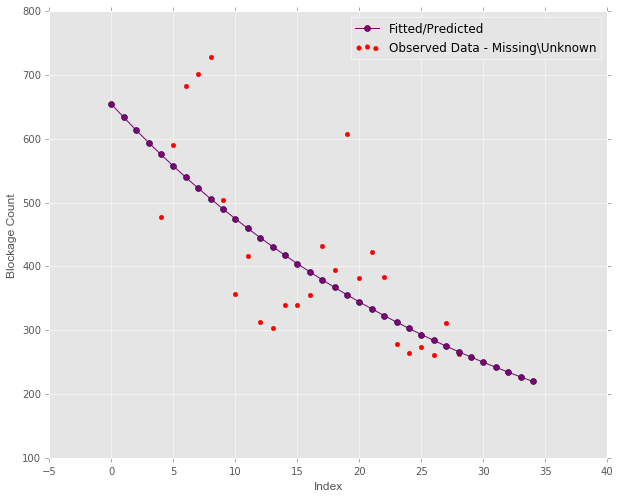

In [6]:
for blockageType in blockageTypes:
    #X = np.array(data[blockageType])
    #GoodnessOfFitPoisson(observedValues=X, blockageType=blockageType)
    # ------------------- POISSON REGRESSION--------------------------
    
    poifamily = sm.families.Poisson(sm.families.links.log)
    familyName = 'Poisson'
    GeneralizedLinearRegression(
        blockageData=data,
        dependentVariable=blockageType,
        independentVariable='Index',
        distributionFamily=poifamily,
        familyName=familyName,
        blockageName = blockageTypeNames[i],
        graphFileName='{0}{1}_{2}.png'.format(folderLocationImages,file,blockageType))
    
    negativeBin = sm.families.NegativeBinomial()
    familyName = 'Negative Binomial'
    GeneralizedLinearRegression(
        blockageData=data,
        dependentVariable=blockageType,
        independentVariable='Index',
        distributionFamily=negativeBin,
        familyName=familyName,
        blockageName = blockageTypeNames[i],
        graphFileName='{0}{1}_{2}_{3}.png'.format(folderLocationImages, file, blockageType,familyName))
    i+=1